<a href="https://colab.research.google.com/github/shadow347/dw_matrix_road_sign/blob/master/day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle("data/train.p")
test = pd.read_pickle("data/test.p")

X_train, y_train = train["features"], train["labels"]
X_test, y_test = test["features"], test["labels"]

In [4]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [5]:
len(np.unique(y_train))

43

In [6]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [8]:
y_train.shape

(34799, 43)

In [9]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

input_shape


(32, 32, 3)

In [10]:
model = Sequential([
     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu", input_shape = input_shape),
     Flatten(),
     Dense(num_classes, activation="softmax")             
                    
])

#model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 12.7761 - accuracy: 0.7634


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu", input_shape = input_shape),
     Flatten(),
     Dense(num_classes, activation="softmax")             
                    
])
  
def train_model(model, X_train, y_train, params_fit ={}):
  model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get("batch_size", 128),
      epochs = params_fit.get("epochs", 5),
      verbose = params_fit.get("verbose", 1),
      validation_data = params_fit.get("validation_data", (X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model

In [12]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 23.8023 - accuracy: 0.7322 - val_loss: 0.2489 - val_accuracy: 0.9390
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2257 - accuracy: 0.9444 - val_loss: 0.1239 - val_accuracy: 0.9683
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1336 - accuracy: 0.9676 - val_loss: 0.1063 - val_accuracy: 0.9697
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0982 - accuracy: 0.9760 - val_loss: 0.1521 - val_accuracy: 0.9683
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0948 - accuracy: 0.9769 - val_loss: 0.1547 - val_accuracy: 0.9653


In [13]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[4.23359348e-10, 1.21619226e-03, 5.02978384e-01, ...,
        1.34676474e-03, 5.30402019e-07, 1.96939163e-06],
       [3.30927750e-11, 2.88815092e-04, 6.01900220e-01, ...,
        1.17198071e-02, 8.66182015e-10, 3.01200580e-05],
       [1.19688107e-10, 2.41471501e-03, 4.89887893e-01, ...,
        3.18739307e-03, 5.08621406e-06, 2.65477811e-05],
       ...,
       [1.87949059e-04, 1.54706528e-02, 2.14713765e-03, ...,
        6.71049638e-05, 2.05414239e-04, 2.66433373e-04],
       [2.37837015e-03, 9.38547179e-02, 2.33598761e-02, ...,
        1.23226587e-02, 4.48009092e-03, 3.86549323e-03],
       [1.91412706e-04, 1.29844975e-02, 2.95888865e-03, ...,
        2.04237716e-04, 5.47298368e-05, 5.55825900e-05]], dtype=float32)

In [19]:
y_pred_prob[400]

array([1.1491634e-01, 2.4161689e-01, 5.5973981e-02, 2.4274535e-10,
       5.8749276e-01, 3.5943007e-08, 1.2264528e-18, 3.0603006e-10,
       2.8057058e-20, 1.7292064e-18, 1.4022553e-13, 1.8311727e-16,
       2.9393354e-19, 1.8401552e-25, 1.5465506e-15, 2.6223346e-30,
       1.3436778e-21, 1.0794592e-17, 2.4961698e-20, 8.8724517e-25,
       2.4508185e-24, 2.7374558e-17, 3.4853704e-27, 7.8383999e-17,
       4.5043825e-21, 1.0570190e-17, 4.8928462e-14, 1.8140297e-21,
       3.6970086e-17, 8.3852905e-16, 5.6720168e-24, 1.0240866e-19,
       1.0889218e-25, 1.9933278e-26, 1.1106996e-25, 4.0775205e-25,
       5.3901737e-37, 2.1702674e-26, 7.7328579e-22, 8.4316735e-23,
       1.1245047e-24, 1.5873231e-26, 1.1062605e-16], dtype=float32)

In [0]:
df = pd.read_csv("data/signnames.csv")
labels_dict = df.to_dict()["b"]

In [22]:
np.argmax(y_pred_prob[400])

4

<BarContainer object of 43 artists>

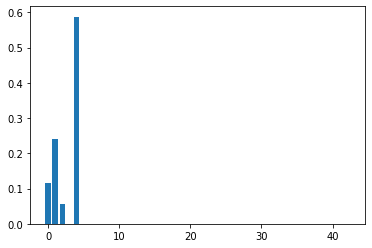

In [26]:
plt.bar(range(43), y_pred_prob[400])

In [24]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (70km/h)'

In [27]:
labels_dict[1]

'Speed limit (30km/h)'

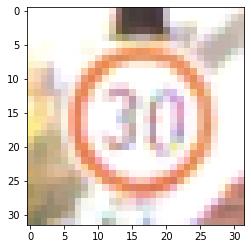

In [18]:
plt.imshow(X_test[400])

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
 
  y_test_norm = np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)

  return scoring(y_test_norm, y_pred)


In [33]:
predict(model_trained, X_test, y_test)

0.8258503401360544

In [36]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
     Conv2D(filters = 32, kernel_size=(3, 3), activation= "relu", input_shape = input_shape),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu"),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),

     Dense(1024, activation="relu"),
     Dropout(0.3),

     Dense(num_classes, activation="softmax")             
                    
])
def train_and_predict(model): 
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

train_and_predict(get_cnn_v2(input_shape, num_classes))  

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 3.7894 - accuracy: 0.4675 - val_loss: 0.5699 - val_accuracy: 0.8726
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6815 - accuracy: 0.8045 - val_loss: 0.2061 - val_accuracy: 0.9586
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3948 - accuracy: 0.8840 - val_loss: 0.1038 - val_accuracy: 0.9810
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2927 - accuracy: 0.9136 - val_loss: 0.0671 - val_accuracy: 0.9862
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2206 - accuracy: 0.9335 - val_loss: 0.0558 - val_accuracy: 0.9889


0.9356009070294785

In [37]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
     Conv2D(filters = 32, kernel_size=(3, 3), activation= "relu", input_shape = input_shape),
     Conv2D(filters = 32, kernel_size=(3, 3), activation= "relu"),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu"),
     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu"),
     MaxPool2D(),
     Dropout(0.3),

     

     Flatten(),

     Dense(1024, activation="relu"),
     Dropout(0.3),

     Dense(num_classes, activation="softmax")             
                    
])


train_and_predict(get_cnn_v3(input_shape, num_classes))  

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 1.7577 - accuracy: 0.5942 - val_loss: 0.2092 - val_accuracy: 0.9532
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.3516 - accuracy: 0.8990 - val_loss: 0.0980 - val_accuracy: 0.9807
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2007 - accuracy: 0.9427 - val_loss: 0.0308 - val_accuracy: 0.9928
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1389 - accuracy: 0.9604 - val_loss: 0.0172 - val_accuracy: 0.9958
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1037 - accuracy: 0.9695 - val_loss: 0.0145 - val_accuracy: 0.9967


0.9664399092970521

In [42]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
     Conv2D(filters = 32, kernel_size=(3, 3), activation= "relu", input_shape = input_shape),
     Conv2D(filters = 32, kernel_size=(3, 3), activation= "relu", padding="same"),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu", padding="same"),
     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu"),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu", padding="same"),
     Conv2D(filters = 64, kernel_size=(3, 3), activation= "relu"),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),

     Dense(1024, activation="relu"),
     Dropout(0.3),

     Dense(1024, activation="relu"),
     Dropout(0.3),

     Dense(num_classes, activation="softmax")             
                    
])

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes)) 

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.7109 - accuracy: 0.2772 - val_loss: 0.9432 - val_accuracy: 0.7167
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.8289 - accuracy: 0.7389 - val_loss: 0.1981 - val_accuracy: 0.9416
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3878 - accuracy: 0.8812 - val_loss: 0.1076 - val_accuracy: 0.9696
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2502 - accuracy: 0.9257 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1852 - accuracy: 0.9441 - val_loss: 0.0378 - val_accuracy: 0.9887


0.9684807256235828

In [43]:
X_train[0].shape

(32, 32, 3)

In [44]:
color.rgb2gray(X_train[0]).shape

(32, 32)

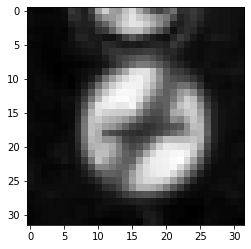

In [48]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap("gray"));

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [57]:
model = get_cnn_v5((32, 32, 1), num_classes)

model_trained = train_model(model, X_train_gray, y_train, params_fit ={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5467 - accuracy: 0.2820 - val_loss: 0.7853 - val_accuracy: 0.7579
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.5757 - accuracy: 0.8155 - val_loss: 0.1467 - val_accuracy: 0.9536
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2548 - accuracy: 0.9183 - val_loss: 0.0723 - val_accuracy: 0.9798
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1677 - accuracy: 0.9482 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1179 - accuracy: 0.9631 - val_loss: 0.0253 - val_accuracy: 0.9929


0.9680272108843537

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

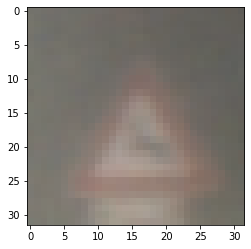

In [59]:
plt.imshow(X_train[400]);

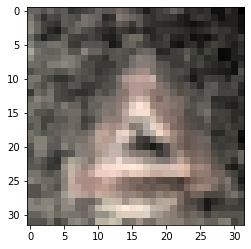

In [62]:
plt.imshow(preproc_img(X_train[400]));